# fruits를 KNN으로 분류하기

In [49]:
import pandas as pd
fruits = pd.read_csv('../Data/fruits.csv')
fruits.head()

,length,weight,name
0,25.4,242.0,apple
1,26.3,290.0,apple
2,26.5,340.0,apple
3,29.0,363.0,apple
4,29.0,430.0,apple


### Feature Set과 Target Set을 Numpy의 Array로 변경

In [50]:
# 연습 : numpy의 column stack과 row stack

import numpy as np
testA = np.array([1,2,3,4])
testB = np.array([10,20,30,40])



In [51]:
# 2개의 array를 묶어서 칼럼기반으로 하나의 array로 만들기
combineA = [[i,j] for i,j in zip(testA, testB)]
print(np.array(combineA))

[[ 1 10]
 [ 2 20]
 [ 3 30]
 [ 4 40]]


In [52]:
# 다른 방법 column_stack : 칼럼으로 쌓기
combineB = np.column_stack((testA,testB))
print(combineB)

[[ 1 10]
 [ 2 20]
 [ 3 30]
 [ 4 40]]


In [53]:
# row_stack : row 로 쌓기
combineC = np.row_stack((testA, testB))
print(combineC)

[[ 1  2  3  4]
 [10 20 30 40]]


In [54]:
fruit_data = np.column_stack((fruits['length'],fruits['weight']))
fruit_data[:5]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

In [55]:
fruit_target = np.array(fruits['name'])
fruit_target

array(['apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'berry', 'berry', 'berry', 'berry', 'berry', 'berry', 'berry',
       'berry', 'berry', 'berry', 'berry', 'berry', 'berry', 'berry'],
      dtype=object)

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
# sklearn으로 train test 분류
train_input, test_input, train_target, test_target = train_test_split(
  fruit_data, 
  fruit_target, 
  stratify=fruit_target, # 동일한 비율로 섞이게 만들어라
  random_state=42
  )

In [58]:
from sklearn.neighbors import KNeighborsClassifier


In [59]:
# knn으로 학습시키기 
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [60]:
# 정확도 출력하기
kn.score(test_input, test_target)

1.0

---
# 수상한 과일?

In [61]:
kn.predict([[25,150]])

array(['berry'], dtype=object)

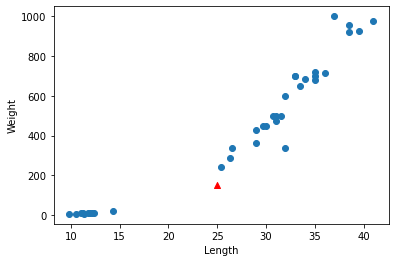

In [62]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker='^',c='red')

plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

> apple쪽에 가까운것 같은데 berry라니?

In [63]:
# 이웃을 출력해보자
distance, indexes = kn.kneighbors([[25,150]])
print(indexes)

[[11 20 13 22 15]]


In [64]:
# 이웃의 index에 해당하는 Feature를 출력
train_input[indexes]

array([[[ 25.4, 242. ],
        [ 14.3,  19.7],
        [ 12.4,  13.4],
        [ 12.2,  12.2],
        [ 26.3, 290. ]]])

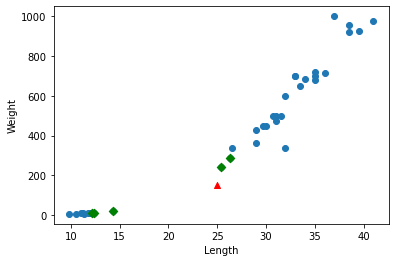

In [65]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker='^',c='red')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D', c='green')

plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

In [66]:
train_input[indexes]

array([[[ 25.4, 242. ],
        [ 14.3,  19.7],
        [ 12.4,  13.4],
        [ 12.2,  12.2],
        [ 26.3, 290. ]]])

In [67]:
train_target[indexes]

array([['apple', 'berry', 'berry', 'berry', 'apple']], dtype=object)

---
# 기준을 맞추자

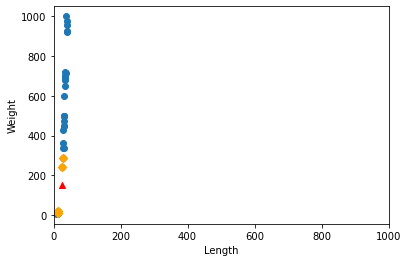

In [68]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^', c='red')
plt.scatter(train_input[indexes, 0], train_input[indexes,1], marker='D', c='orange')

plt.xlabel('Length')
plt.ylabel('Weight')
plt.xlim(0, 1000)
plt.show()

> sample이 Length에는 거의 영향을 받지 않고 Weight에서 영향을 많이 받는다.
> 차트의 모양대로 현재는 berry로 생각하는 것이 맞는것 같다.

In [69]:
# Length와 Weight의 평균과 표준편차를 구해서 비교해보자
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

In [70]:
print(mean, std)

[ 26.93333333 441.98333333] [ 10.09141549 325.61300692]


> Length와 Weight의 차이가 너무 심하다

---
# train_data를 표준점수(Z점수)로 변경하자
표준점수 = (Feature - 평균) / 표준편차

In [73]:
train_scaled = (train_input - mean) / std
train_scaled[0:5]

array([[ 0.79935928,  0.85382543],
       [ 0.20479453, -0.24256812],
       [-1.54917151, -1.33066961],
       [ 0.37325454,  0.17817675],
       [-1.55908092, -1.32729137]])

In [72]:
# sklearn을 이용한 방법
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_input)
train_scaled2 = scaler.transform(train_input)
train_scaled2[0:5]

array([[ 0.79935928,  0.85382543],
       [ 0.20479453, -0.24256812],
       [-1.54917151, -1.33066961],
       [ 0.37325454,  0.17817675],
       [-1.55908092, -1.32729137]])

### 전처리 데이터로 모델 훈련하기

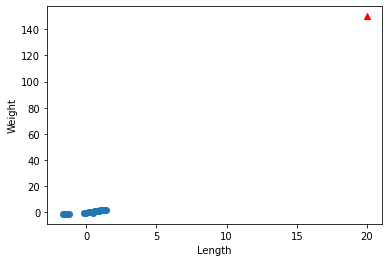

In [75]:
plt.scatter(train_scaled2[:,0], train_scaled2[:,1])
plt.scatter(20,150, marker='^', c='red')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

> 예측할 데이터로 표준점수로 변경이 필요

In [76]:
new = ([25,150]- mean) / std
new

array([-0.19158198, -0.89671889])

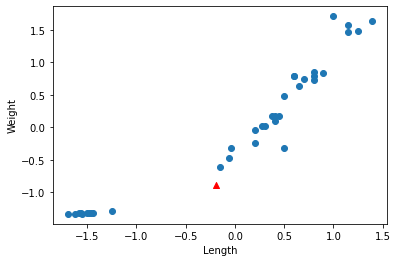

In [77]:
plt.scatter(train_scaled2[:,0], train_scaled2[:,1])
plt.scatter(new[0],new[1], marker='^', c='red')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

### KNN으로 분류

In [78]:
kn.fit(train_scaled2, train_target)

KNeighborsClassifier()

In [79]:
# 검증 데이터도 표준점수로 변경 (*** 중요 : 평균과 표준편차는 Train Set에서 구한 값으로 사용한다.)
test_scaled = (test_input - mean) / std

In [80]:
# 정확도 확인
kn.score(test_scaled, test_target)

1.0

In [81]:
# 수상한 과일을 다시 예측하자
print(kn.predict([new]))

['apple']


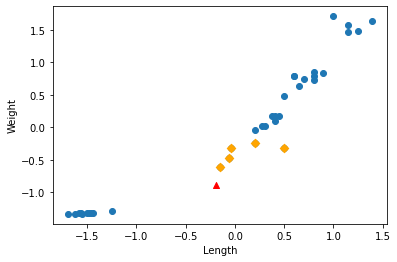

In [82]:
# 확인을 위해 이웃을 출력하자
distance,  indexes = kn.kneighbors([new])

plt.scatter(train_scaled2[:,0], train_scaled2[:,1])
plt.scatter(new[0],new[1], marker='^', c='red')
plt.scatter(train_scaled2[indexes,0], train_scaled2[indexes,1], marker='D', c='orange')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()